# Principal Component Analysis: Data Visualisation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris 
%matplotlib inline

# Prepare data

## Load Iris database

In [3]:
# load Iris dataset into dataframe
df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
                 , header=None, sep=',')
df.columns=['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [4]:
# show the last 5 lines of the table
df.tail()

,sepal length,sepal width,petal length,petal width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# save dataframe as latex file
with open('X_original.tex', 'w') as tf:
     tf.write(df.to_latex())

In [6]:
# split data table into data X and class labels y
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values

## Standardize data

In [7]:
# fit data onto an unit scale (mean=0, variance=1)
X_std = StandardScaler().fit_transform(X)

In [8]:
df = pd.DataFrame(data = X_std, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df.tail()

,sepal length,sepal width,petal length,petal width
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


In [9]:
# save dataframe as latex file
with open('X_std.tex', 'w') as tf:
     tf.write(df.to_latex())

# Calculate Principal Components

## Covariance Matrix

In [10]:
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs.round(2))
print('\nEigenvalues \n%s' %eig_vals.round(2))

Eigenvectors 
[[ 0.52 -0.37 -0.72  0.26]
 [-0.26 -0.93  0.24 -0.12]
 [ 0.58 -0.02  0.14 -0.8 ]
 [ 0.57 -0.07  0.63  0.52]]

Eigenvalues 
[2.93 0.93 0.15 0.02]


## Singular Value Decomposition

In [11]:
u,s,v = np.linalg.svd(X_std.T)
u.round(2)

array([[-0.52, -0.37,  0.72,  0.26],
       [ 0.26, -0.93, -0.24, -0.12],
       [-0.58, -0.02, -0.14, -0.8 ],
       [-0.57, -0.07, -0.63,  0.52]])

# Sort the Eigenpairs

In [12]:
# make a list of eigenpair tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# sort the eigenpair tuples in descending order by eigenvalues
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# confirm the eigenvalues are sorted correctly
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.9303537755893165
0.9274036215173417
0.1483422264816399
0.02074601399559571


# Visualisation of Explained Variance

In [13]:
# calculate the cumulative variance
total = sum(eig_vals)
var = [(i / total)*100 for i in eig_vals]
cum_var = np.cumsum(var)

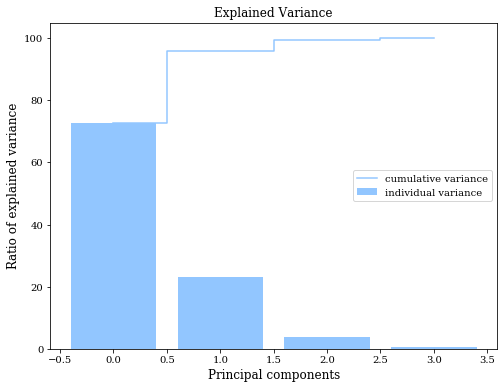

In [14]:
with plt.style.context('seaborn-pastel'):
    g = plt.figure(figsize=(8, 6))
    
    #plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    plt.bar(range(4), var, alpha=1, align='center',
            label='individual variance')
    plt.step(range(4), cum_var, where='mid',
             label='cumulative variance')
    
    plt.title('Explained Variance', fontsize=12)
    plt.ylabel('Ratio of explained variance', fontsize=12)
    plt.xlabel('Principal components', fontsize=12)
    plt.legend(loc='best')
    
    g.savefig("exp_var.pdf", bbox_inches='tight')

# PCA Projection  to 2D

In [15]:
# construct the projection matrix W from the top two eigenvectors
a = np.array([-u[0][0], u[0][1]])
b = np.array([-u[1][0], u[1][1]])
c = np.array([-u[2][0], u[2][1]])
d = np.array([-u[3][0], u[3][1]])

w_matrix = np.stack((a,b,c,d))

print("Matrix W:\n", w_matrix)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [16]:
# calculate dot product of matrix X (standardized) and W to get the new subspace feature matrix Y
Y = X_std.dot(w_matrix)

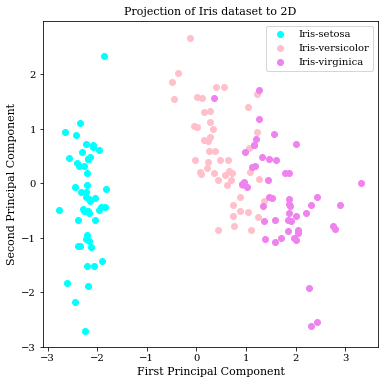

In [17]:
with plt.style.context('seaborn-pastel'):
    
    f = plt.figure(figsize=(6, 6))
    plt.rc('font', family='serif')
    
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['cyan', 'pink', 'violet']
    for lab, col in zip(classes, colors):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
        
    plt.title('Projection of Iris dataset to 2D', fontsize=11)
    plt.xlabel('First Principal Component', fontsize=11)
    plt.ylabel('Second Principal Component', fontsize=11)
    plt.legend(loc='best')
    
    plt.show()
    
    f.savefig("Iris_2D.pdf", bbox_inches='tight')

# Reconstructing Original Dataset

In [18]:
# reconstruct the original dataset using two principal components
mu = np.mean(X, axis=0)
pca = PCA(n_components=2)
Y_pca = pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

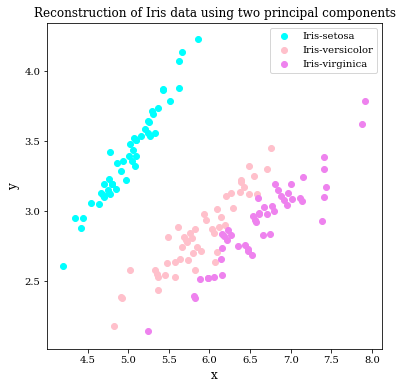

In [21]:
with plt.style.context('seaborn-pastel'):
    h = plt.figure(figsize=(6, 6))
    plt.rc('font', family='serif')
    
    classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
    colors = ['cyan', 'pink', 'violet']
    for lab, col in zip(classes, colors):
        plt.scatter(Xhat[y==lab, 0],
                    Xhat[y==lab, 1],
                    label=lab,
                    c=col)
    
    plt.title('Reconstruction of Iris data using two principal components', fontsize=12)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.legend(loc='best')
    
    plt.show()
    
    h.savefig("Iris_recon.pdf", bbox_inches='tight')